<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork821-2023-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# ***Distance Metrics***

$ \ $

The following are the use cases of Distance Metrics:

$ \ $

$(1)$ ***Classification***: $KNN$ model uses a distance metric to find a data point's top $k$-nearest neighbors.

$ \ $


$(2)$ ***Clustering***: $K$-Means algorithm assigns data points to the nearest centroids using a distance metric.

$ \ $


$(3)$ ***Natural Language Processing***: $NLP$ uses the cosine similarity distance metric to filter out irrelevant documents from the corpus once the unstructured data is transformed into vector form.


$ \ $ 

----

## ***Why different distance metrics matter?***

$ \ $

There are many ways to define the distance between two objects. To give you a real-life example, suppose you want to go from one city to another on a map, there will be at least two different distances. One is the driving distance and the other could be the flying distance. Depending on how you choose to travel, one of the distances could make completely no sense to you.

<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML0187EN-SkillsNetwork/labs/module%202/images/distance.jpg" width="60%">

Same idea applies to Machine Learning, choosing the correct distance metric is critical to the performance of the downstream task. In this notebook, you will practice applying the distance metrics learned in this course. Using real-world data, you will analyze similarities and dissimilarities in data. You will also be able to understand how various algorithms such as $DBSCAN$ are affected by different distance metrics.

$ \ $

----

## ***Objectives***

$ \ $

After completing this lab you will be able to:

* Understand the mathematics behind the euclidean, manhattan, cosine, and jaccard distance metrics.


* Understand the use cases of the covered distance metrics.

$ \ $

----

## ***Datasets***

$ \ $

Datasets for this lab are gathered from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork821-2023-01-01) under the MIT License.


$ \ $

----

## ***Setup***

$ \ $

For this lab, we will be using the following libraries:


 * [`pandas`](https://pandas.pydata.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork821-2023-01-01) for managing the data.


 * [`numpy`](https://numpy.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork821-2023-01-01) for mathematical operations.


 * [`matplotlib`](https://matplotlib.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork821-2023-01-01) for visualizing the data.


 * [`scipy`](https://docs.scipy.org/doc/scipy/reference/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork821-2023-01-01) for complex numerical operations.


 * [`sklearn`](https://scikit-learn.org/stable/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork821-2023-01-01) for machine learning and machine-learning-pipeline related functions.


$ \ $

----

## ***Installing Required Libraries***

$ \ $

The following required modules are pre-installed in the Skills Network Labs environment. 

In [1]:
import pandas as pd
import numpy as np
import scipy
from scipy.spatial.distance import euclidean, cityblock, cosine
import sklearn.metrics.pairwise
import matplotlib.pyplot as plt
from sklearn.metrics import jaccard_score
from sklearn.metrics.pairwise import paired_euclidean_distances
from sklearn.metrics.pairwise import manhattan_distances
from sklearn.metrics.pairwise import cosine_distances
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import DBSCAN
from sklearn.metrics import jaccard_score
from sklearn.preprocessing import OneHotEncoder
import scipy.special
%matplotlib inline

In [2]:
# Surpress numpy data type warnings
import warnings
warnings.filterwarnings("ignore", category = DeprecationWarning) 
warnings.filterwarnings("ignore", category = UserWarning)
warnings.filterwarnings("ignore", category = RuntimeWarning) 
warnings.filterwarnings("ignore", category = FutureWarning)

In [3]:
def zip(list_1, list_2):
  lista = []
  if (len(list_1) == len(list_2)):
    for i in range(len(list_1)):
      lista.append((list_1[i], list_2[i]))
  return lista 

$ \ $ 

----

## ***Defining Helper Functions***

$ \ $

In the section below, we will define helper functions that will help analyze different distance metrics.

$ \ $

$(1)$ ***Average Distance.***

This function will return the average distance between two sets of data given our provided distance metric, i.e., each point in  $X$  with each other point in  $Y$. Refer to the image below:

<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML0187EN-SkillsNetwork/labs/module%202/images/avg_distance.png" width="30%" height="auto/">

In [4]:
# X es un conjunto de datos
# Y es un conjunto de datos
# distance_func es la funcion que mide la distancia entre puntos
def avg_distance(X, Y, distance_func):   

    # describimos las longitudes de nuestra data
    m = len(X)
    n = len(Y)

    # empezamos describiendo  res igual a cero
    res = 0

    # realizamos una iteracion sobre la data X
    for x in X:

        # realizamos una iteracion sobre la data Y
        for y in Y:

            # si la funcion de distancia es jaccard_score entonces res = \sum (1-d(x,y))
            if distance_func == jaccard_score: 

                # actualizamos a res
                res = res + (1 - distance_func(x, y))

            # si la funcion de distancia no es jaccard_score entonces res = \sum d(x,y)
            elif distance_func != jaccard_score:

                # actualizamos a res
                res = res + distance_func(x, y)

    # res = \sum (d(x,y)/mn) o res = \sum (1-d(x,y)/mn)
    return res / (m*n)

$ \ $

$(2)$ ***Pairwise Distance.***

This function will return the average pairwise distance between two sets of data. The distance for each row in $X$ from the corresponding row in $Y$. The number of rows of in the two sets of data should be equal. Refer to the image below:

<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML0187EN-SkillsNetwork/labs/module%202/images/pairwise_distance.png" width="30%" height="auto">

In [5]:
def avg_pairwise_distance(X, Y, distance_func):
    return sum(map(distance_func, X, Y)) / min(len(X), len(Y))

$ \ $

-----

## ***Load the datafile into pandas.DataFrame***

$ \ $

$(1)$ Before working with the data, it must be loaded into a ***`pandas.DataFrame`***.



In [6]:
df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML0187EN-SkillsNetwork/labs/module%202/iris.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


$ \ $ 

$(2)$ For the purpose of this lab, we will not be using the ***`"petal_width"`*** column.

In [7]:
df.drop(['petal_width'], axis = 1, inplace = True)
df.head()

,sepal_length,sepal_width,petal_length,species
0,5.1,3.5,1.4,setosa
1,4.9,3.0,1.4,setosa
2,4.7,3.2,1.3,setosa
3,4.6,3.1,1.5,setosa
4,5.0,3.6,1.4,setosa


$ \ $

$(3)$ Let's see what the different ***`"species"`*** types are in the dataset.

In [8]:
species = df['species'].unique()
species

array(['setosa', 'versicolor', 'virginica'], dtype=object)

$ \ $

$(4)$ Let's view the three species of irises data in $3D$ using matplotlib.

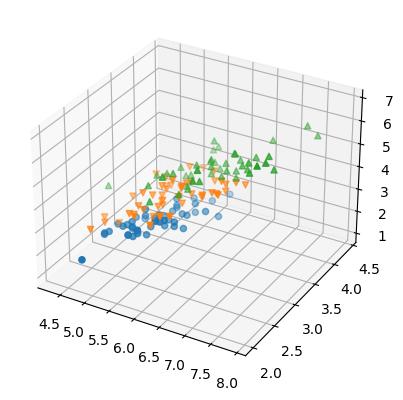

In [9]:
# tomamos el nombre de las primeras 3 columnas -----attrs = attributes
attrs = ['sepal_length', 'sepal_width', 'petal_length']

# describimos 3 marcadores
markers = ['o', 'v', '^']

# creamos una grafica para realizar varios plots
fig = plt.figure()

# creamos un subplot en una imagen proyectada en 3d
ax = fig.add_subplot(projection = '3d')

# realizamos una iteracion sobre [('setosa','o'), ('versicolor','v'), ('virginica','^')]
for specie, marker in zip(species, markers):

    # describimos el subdataframe de df tal que:
    # los renglones son aquellos que satisfacen que satisfacen df['species'] == specie
    # las columnas son los atributos mostrados anteriormente
    mask = df['species'] == specie
    specie_data = df.loc[mask][attrs]

    # creamos una lista con 3 elementos, los cuales son las 3 columnas de specie_data
    x, y, z = [specie_data[t] for t in attrs]

    # creamos un scatterplot (x,y,z)
    ax.scatter(x, y, z, marker = marker)

# mostramos la grafica en pantalla
plt.show()

$ \ $

$(5)$ Create variables for the ***`"species"`*** data, as ***np.ndarrays***.

In [10]:
# describimos los renglones del dataframe df con valor 'setosa' en la columna 'species'
mask_1 = df['species'] == 'setosa'
setosa_data = df.loc[mask_1][attrs].to_numpy()

# describimos los renglones del dataframe df con valor 'versicolor' en la columna 'species'
mask_2 = df['species'] == 'versicolor'
versicolor_data = df.loc[mask_2][attrs].to_numpy()

# describimos los renglones del dataframe df con valor 'virginica' en la columna 'species'
mask_3 = df['species'] == 'virginica'
virginica_data = df.loc[mask_3][attrs].to_numpy()

$ \ $

$(6)$ In a the NumPy array, each point is a row and each column is a dimension, we can see this by using shape.

In [11]:
setosa_data.shape

(50, 3)

In [12]:
setosa_data

array([[5.1, 3.5, 1.4],
       [4.9, 3. , 1.4],
       [4.7, 3.2, 1.3],
       [4.6, 3.1, 1.5],
       [5. , 3.6, 1.4],
       [5.4, 3.9, 1.7],
       [4.6, 3.4, 1.4],
       [5. , 3.4, 1.5],
       [4.4, 2.9, 1.4],
       [4.9, 3.1, 1.5],
       [5.4, 3.7, 1.5],
       [4.8, 3.4, 1.6],
       [4.8, 3. , 1.4],
       [4.3, 3. , 1.1],
       [5.8, 4. , 1.2],
       [5.7, 4.4, 1.5],
       [5.4, 3.9, 1.3],
       [5.1, 3.5, 1.4],
       [5.7, 3.8, 1.7],
       [5.1, 3.8, 1.5],
       [5.4, 3.4, 1.7],
       [5.1, 3.7, 1.5],
       [4.6, 3.6, 1. ],
       [5.1, 3.3, 1.7],
       [4.8, 3.4, 1.9],
       [5. , 3. , 1.6],
       [5. , 3.4, 1.6],
       [5.2, 3.5, 1.5],
       [5.2, 3.4, 1.4],
       [4.7, 3.2, 1.6],
       [4.8, 3.1, 1.6],
       [5.4, 3.4, 1.5],
       [5.2, 4.1, 1.5],
       [5.5, 4.2, 1.4],
       [4.9, 3.1, 1.5],
       [5. , 3.2, 1.2],
       [5.5, 3.5, 1.3],
       [4.9, 3.1, 1.5],
       [4.4, 3. , 1.3],
       [5.1, 3.4, 1.5],
       [5. , 3.5, 1.3],
       [4.5, 2.3

$ \ $

-----

## ***Euclidean Distance***

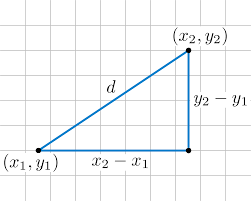

In this task, you will learn and practice applying Euclidean distance. Euclidean distance is simply the physical distance between two points.Euclidean distance is useful when physical distance matters most. We know from high school math the distance between two points on a plane $(2D)$ given by $x = (x_{1}, x_{2})$ and  $y = (y_{1}, y_{2})$ is:

$ \ $

$$d(x,y) = ||x-y|| = \sqrt{(x-y)\bullet (x-y)} =\sqrt{(x_{1}-y_{1})^{2} + (x_{2}-y_{2})^{2}}$$

$ \ $

The distance between two points in $3D$ given by  $x = (x_{1}, x_{2}, x_{3})$ and $y = (y_{1}, y_{2}, y_{3})$ is:

$ \ $

$$d(x,y) = ||x-y|| =\sqrt{(x-y)\bullet (x-y)} = \sqrt{(x_{1}-y_{1})^{2} + (x_{2}-y_{2})^{2} + (x_{3}-y_{3})^{2}}$$

$ \ $

and the general equation for the euclidean distance between two points in $n$-dimentions $x = (x_{1}, \dots, x_{n})$ and $y = (y_{1}, \dots, y_{n})$ is:

$ \ $

$$d(x,y) = ||x-y|| =\sqrt{(x-y)\bullet (x-y)} = \sqrt{\sum_{i=1}^{n} (x_{i}-y_{i})^{2}}$$


$ \ $

-----

## ***Example***

$ \ $

$(1)$ Let's use the euclidean function.

In [13]:
euclidean([0, 0], [3, 4])

5.0

$ \ $

$(2)$ Let's find the average euclidean distance between the data of different species of irises. In this case, we calculate the average euclidean distance between setosa and versicolor.

In [14]:
avg_distance(setosa_data, versicolor_data, euclidean)

3.1110307382429827

$ \ $

$(3)$ Let's calculate the average euclidean distance between setosa and virginica.

In [15]:
avg_distance(setosa_data, virginica_data, euclidean)

4.470017704302476

$ \ $

$(4)$ We can also determine the euclidean distances between two points using ***paired_euclidean_distances*** from ***`sklearn.metrics.pairwise`***. The input must be a numpy array where each point is a row.

In [16]:
# describimos el punto (0,0)
X = np.array([[0, 0]], dtype = float)

# describimos el punto (3,4)
Y = np.array([[3, 4]], dtype = float)

# describimos la distancia entre X y Y
paired_euclidean_distances(X, Y).mean()

5.0

$ \ $

$(5)$ We apply our own version of the function.

In [17]:
avg_pairwise_distance(X, Y, euclidean)

5.0

$ \ $

$(6)$ If we have two $M \times N$ arrays, where each row is one of $M$ points and each column is $N$ dimensions in two arrays.

In [18]:
M, N = setosa_data.shape
print(f'{M} points and each column is {N} dimensions')

50 points and each column is 3 dimensions


$ \ $

$(7)$  As above, we can calculate the distance between each array, then average the distance as follows.

* First, we calculate the distance between each row.

* Then, we find the average value.

In [19]:
# calculamos las distancias entre cada array
row_dist = paired_euclidean_distances(setosa_data, versicolor_data)

# mostramos los resultados
row_dist

array([3.81968585, 3.44963766, 4.22018957, 2.77488739, 3.62353419,
       3.02324329, 3.71348893, 2.06155281, 3.88329757, 2.45153013,
       2.65518361, 2.85131549, 2.97321375, 4.02616443, 2.64764046,
       3.33166625, 3.33016516, 2.90172363, 3.26343377, 2.77488739,
       3.14642654, 2.83901391, 4.39431451, 3.20156212, 2.92745623,
       3.2249031 , 3.72021505, 3.84057287, 3.24037035, 2.22934968,
       2.41246762, 2.41867732, 2.84253408, 4.02367991, 3.04302481,
       3.45398321, 3.62767143, 3.318132  , 3.04630924, 2.68700577,
       3.26649659, 3.73363094, 3.1       , 2.0808652 , 2.59807621,
       2.94108823, 2.81602557, 3.32565783, 1.93132079, 2.83372546])

In [20]:
# describimos el promedio del array anterior
row_dist.mean()

3.1208199582684055

$ \ $

$(8)$ Now, applying our own function.

In [21]:
avg_pairwise_distance(setosa_data, virginica_data, euclidean)

4.467297089536803

$ \ $ 

----

## ***Manhattan Distance***

$ \ $

In this task, you will learn and practice applying Manhattan distance, sometimes called the  $L^{1}$ - norm and "cityblock" distance. The  Manhattan distance is even simpler than euclidean distance. It can be described as the sum of the absolute value of the difference in each dimention of two points.
Manhattan distance can be preferrable to euclidean distance in high-dimentional situations. The Manhattan distance between two points on a plane $(2D)$ given by  $x = (x_{1}, x_{2})$ and $y=(y_{1}, y_{2})$ is:

$ \ $

$$d(x,y) = |x_{1}-y_{1}| + |x_{2}-y_{2}|$$

$ \ $

and the general equation for the manhattan distance between two points in $n$-dimentions $x = (x_{1}, \dots, x_{n})$ and $y=(y_{1},\dots, y_{n})$ is:

$ \ $

$$d(x,y) = \sum \limits_{i=1}^{n}|x_{i}-y_{i}| $$

$ \ $

$(1)$ We can use the function `cityblock` from `scipy.spatial.distance` to compute the manhattan distance between two points.


In [22]:
cityblock([1, 1], [-2, 2])

4

$ \ $

$(2)$ Let's find the average manhattan distance between setosa and setosa.

In [23]:
avg_distance(setosa_data, setosa_data, cityblock)

0.9921600000000026

$ \ $

$(3)$ Let's find the average manhattan distance between setosa and versicolor.

In [24]:
avg_distance(setosa_data, versicolor_data, cityblock)

4.439119999999999

$ \ $

$(4)$ Let's find the average manhattan distance between setosa and virginica.

In [25]:
avg_distance(setosa_data, virginica_data, cityblock)

6.219039999999988

$ \ $

$(5)$ We can also determine the pairwise Manhattan Distances between two points using <code>manhattan_distances</code> from <code>sklearn.metrics.pairwise</code>.


In [26]:
X = np.array([[1, 1]])
Y = np.array([[-2, 2]])

In [27]:
manhattan_distances(X, Y)

array([[4.]])

$ \ $

-----

## ***Cosine Distance***



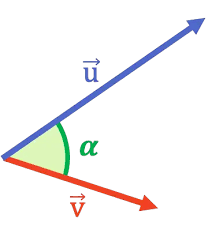

In this task, you will learn and practice applying ***Cosine distance***. The cosine distance between two points can be thought of as one minus the cosine of the angle between them with respect to the origin. As such, it has a value in the range $[0, 2]$ where:


 * $0$ means "in the same direction".

 * $1$ means "perpendicular".

 * $2$ means "in the opposite direction.".
 
So, the lower the cosine distance, the more-similar two points are (in direction). Cosine distance is useful when "direction" matters more than euclidean distance. For example, the cosine distance between two points on $\mathbb{R}^{n}$ given by  $x =(x_{1},\dots, x_{n})$ and  $y = (y_{1}, \dots, y_{n})$ is:

$ \ $

$$ \text{Cosine distance}(x,y)=1 -\dfrac{x\bullet y}{||x|| \cdot ||y||}= 1-\dfrac{\sum\limits_{i=1}^{n}x_{i} \cdot y_{i}}{\sqrt{\sum\limits_{i=1}^{n}x^{2}_{i}} \cdot \sqrt{\sum\limits_{i=1}^{n}y^{2}_{i}}}$$

$ \ $

$(1)$ We can use the function cosine from ***`scipy.spatial.distance`*** to compute the cosine distance between two points.

In [28]:
cosine([1, 1], [-1, -1])

2.0

$ \ $

$(2)$ For this exercise, we will use a different dataset. Download the dataset `"auto-mpg.data"`, which contains information about cars from $1970$ to $1982$.


In [29]:
# describimos la url a trabajar
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML0187EN-SkillsNetwork/labs/module%202/auto-mpg.data'

# establecemos los atributos del dataframe que trabajaremos (es posible que hallan mas atributos, pero solo trabajaremos estos)
names = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year', 'origin', 'car_name']

# describimos nuestro dataframe con la url  y los parametros dados anteriormente
df = pd.read_csv(url, header = None, delim_whitespace = True, names = names)

# mostramos los primeros 5 renglones del dataframe
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


$ \ $

$(3)$ For this example we are only using the "mpg" and "weight" features.

In [30]:
# tomamos la columna 'car_name' de df y realizamos un split sobre las cadenas correspondientes obteniendo listas del tipo ["chevrolet","chevelle","malibu"]
split_car = df['car_name'].str.split()

# obtenemos la marca correspondiente del carro tomando el elemento cero de las listas del frame anterior ["chevrolet","chevelle","malibu"][0]=="chevrolet"
marca = split_car.apply(lambda l: l[0])

# remplazamos:  'chevrolet' -----> 'chevy'
df['car_name'] = marca.replace('chevrolet', 'chevy')

# renombramos la columna:  "car_name" ---------> "make"
df.rename(columns = {'car_name': 'make'}, inplace = True)

# nos quedamos solo con las columnas 'mpg', 'weight', 'make'
df = df[['mpg', 'weight', 'make']]

# mostramos los primeros 5 renglones en pantalla
df.head()

,mpg,weight,make
0,18.0,3504.0,chevy
1,15.0,3693.0,buick
2,18.0,3436.0,plymouth
3,16.0,3433.0,amc
4,17.0,3449.0,ford


$ \ $

$(4)$ Normalize the numerical data (important for cosine distance if you want features to have "equal weight").

In [31]:
# tomamos las primeras dos columnas, las cuales son precisamente las columnas de tipo numerico
dfn = df[['mpg', 'weight']]

# normalizamos nuestros datos
# m <= x <= M -------> 0 <= (x-m)/(M-m) <= 1
M = dfn.max()
m = dfn.min()
df[['mpg', 'weight']] = (dfn - m)/(M-m)

# mostramos los primeros 5 renglones del dataframe normalizado
df.head()

,mpg,weight,make
0,0.239362,0.536150,chevy
1,0.159574,0.589736,buick
2,0.239362,0.516870,plymouth
3,0.186170,0.516019,amc
4,0.212766,0.520556,ford


$ \ $

$(5)$ Let's use cosine distance to compare ***`chevy`*** and ***`honda`*** makes from $1970$ to $1982$.

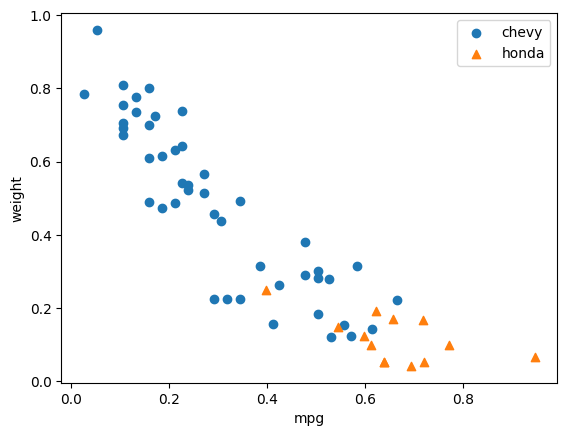

In [32]:
# creamos una mascara que nos muestre cuando la columna 'make' tenga valor 'chevy' y luego tomamos los renglones del dataframe que satisfacen el valor de la mascara
mask_chevy = df['make'] == 'chevy'
chevy = df[mask_chevy]

#  creamos una mascara que nos muestre cuando la columna 'make' tenga valor 'honda' y luego tomamos los renglones del dataframe que satisfacen el valor de la mascara
mask_honda = df['make'] == 'honda'
honda = df[mask_honda]

# creamos un scatterplot (x,y) en el plano cartesiano
x = chevy['mpg']
y = chevy['weight']
plt.scatter(x, y, marker = 'o', label = 'chevy')

# creamos un scatterplot (x,y) en el plano cartesiano
x = honda['mpg']
y = honda['weight']
plt.scatter(x, y, marker = '^', label = 'honda')

# describimos la etiqueta del eje x
plt.xlabel('mpg')

# describimos la etiqueta del eje y
plt.ylabel('weight')

# mostramos la leyenda del plot
plt.legend()

# mostramos la imagen en pantalla
plt.show()


$ \ $

$(6)$ We calculate the average cosine distance between chevy and chevy.

In [33]:
# tomamos nuestro dataframe chevy, seleccionamos las columnas numericas y describimos esta data como un array
chevy_data = chevy[['mpg', 'weight']].to_numpy()

# tomamos nuestro dataframe chevy, seleccionamos las columnas numericas y describimos esta data como un array
honda_data = honda[['mpg', 'weight']].to_numpy()

In [34]:
avg_distance(chevy_data, chevy_data, cosine) 

0.1686029684688174

$ \ $

$(7)$ We calculate the average cosine distance between honda and honda.

In [35]:
avg_distance(honda_data, honda_data, cosine)

0.017557196207440316

$ \ $ 

$(8)$ We calculate the average cosine distance between honda and chevy.

In [36]:
avg_distance(honda_data, chevy_data, cosine)

0.3511900540950527

$ \ $

$(9)$ We can also determine the  pairwise cosine distance between two points using <code>cosine_distances</code> from <code>sklearn.metrics.pairwise</code>.


In [37]:
X = np.array([[1, 1]])
Y = np.array([[-1, -1]])
cosine_distances(X, Y)

array([[2.]])

$ \ $

$(10)$ Also, you can derive the cosine distance from the cosine similarity as follows:

$ \ $

$$\text{cosine_distance}(x,y) = 1 - \text{cosine_similarity}(x,y)$$

In [38]:
# cosine_distances(X, Y) = 1-cosine_similarity(X,Y)
1-cosine_similarity(X,Y)

array([[2.]])

$ \ $

$(11)$ We calculate the average pairwise cosine distance between chevy and chevy.

In [39]:
cosine_distances(chevy_data, chevy_data).mean()

0.1686029684688178

$ \ $

$(12)$ We calculate the average pairwise cosine distance between honda and chevy.

In [40]:
cosine_distances(honda_data, chevy_data).mean()

0.35119005409505294

$ \ $

-----

## ***Analyzing Distance Metrics with DBSCAN***

$ \ $

Now that we've learned various numerical distance metrics, let's see how they affect a clustering algorithm.

$ \ $
 
$(1)$ We begin by importing the `DBSCAN` object from `sklearn.neighbors` and downloading a synthetic dataset for clustering.

In [41]:
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML0187EN-SkillsNetwork/labs/module%202/data/synthetic_clustering.csv'
df = pd.read_csv(url)
df.head()

,x,y
0,-0.285980,1.149042
1,-0.296288,1.204223
2,-1.157672,-1.406545
3,-0.653802,-0.993525
4,1.347072,1.329942


$ \ $

$(2)$ We make a scatterplot over the dataframe attributes.

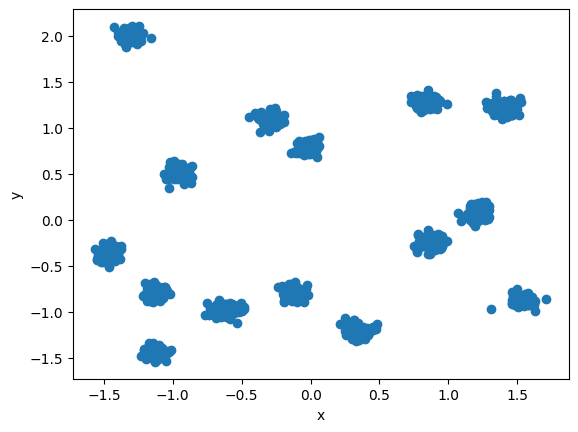

In [42]:
# creamos un scatterplot (x,y)
x = df['x']
y = df['y']
plt.scatter(x, y)

# describimos las etiquetas del eje x
plt.xlabel('x')

# describimos las etiquetas del eje y
plt.ylabel('y')

# mostramos la imagen en pantalla
plt.show()

$ \ $

$(3)$ We use the $\color{aquamarine}{\text{Euclidean distance}}$ for doing $\color{lightblue}{\text{Density-based spatial clustering of applications with noise}}$ ($DBSCAN$) applied to the previous scatterplot.

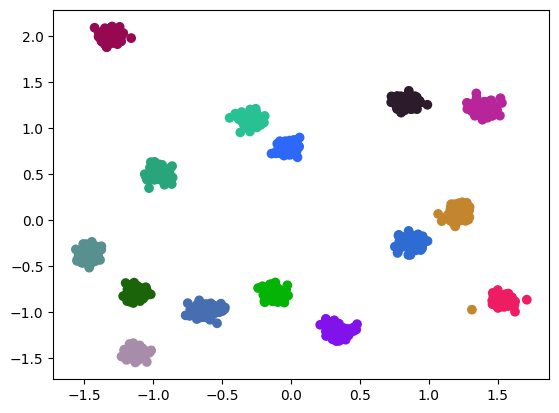

In [43]:
# creamos un modelo DBSCAN con metrica euclidiana
dbscan = DBSCAN(eps = 0.1, metric = euclidean)

# entrenamos nuestro modelo con el dataframe df completo
dbscan.fit(df)

# establecemos los colores de tal manera que obtengamos un array de tamaño m x 3
colors = np.random.random(size = 3*(dbscan.labels_.max()+1)).reshape(-1, 3)

# creamos de nuevo el scatter plot de la figuara anterior pero coloreado aleatoriamente
x = df['x']
y = df['y']
colores = dbscan.labels_
plt.scatter(x, y, c = [colors[l] for l in colores])

# mostramos nuestra imagen en pantalla
plt.show()

$ \ $

$(4)$ We use the $\color{aquamarine}{\text{Manhattan distance}}$ for doing $\color{lightblue}{\text{Density-based spatial clustering of applications with noise}}$ ($DBSCAN$) applied to the previous scatterplot.

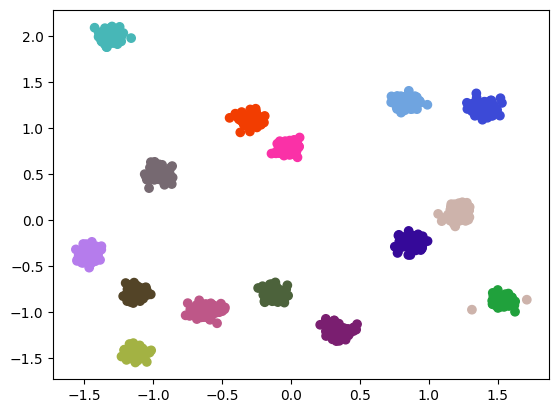

In [44]:
# creamos un modelo DBSCAN con metrica euclidiana
dbscan = DBSCAN(eps = 0.1, metric = cityblock)

# entrenamos nuestro modelo con el dataframe df completo
dbscan.fit(df)

# establecemos los colores de tal manera que obtengamos un array de tamaño m x 3
colors = np.random.random(size = 3*(dbscan.labels_.max()+1)).reshape(-1, 3)

# creamos de nuevo el scatter plot de la figuara anterior pero coloreado aleatoriamente
x = df['x']
y = df['y']
colores = dbscan.labels_
plt.scatter(x, y, c = [colors[l] for l in colores])

# mostramos nuestra imagen en pantalla
plt.show()

$ \ $

$(5)$ We use the $\color{aquamarine}{\text{cosine distance}}$ for doing $\color{lightblue}{\text{Density-based spatial clustering of applications with noise}}$ ($DBSCAN$) applied to the previous scatterplot.

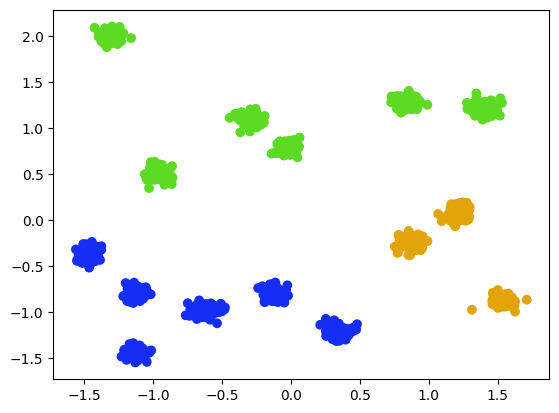

In [45]:
# creamos un modelo DBSCAN con metrica euclidiana
dbscan = DBSCAN(eps = 0.1, metric = cosine)

# entrenamos nuestro modelo con el dataframe df completo
dbscan.fit(df)

# establecemos los colores de tal manera que obtengamos un array de tamaño m x 3
colors = np.random.random(size = 3*(dbscan.labels_.max()+1)).reshape(-1, 3)

# creamos de nuevo el scatter plot de la figuara anterior pero coloreado aleatoriamente
x = df['x']
y = df['y']
colores = dbscan.labels_
plt.scatter(x, y, c = [colors[l] for l in colores])

# mostramos nuestra imagen en pantalla
plt.show()

Clearly, euclidean and manhattan distances have very similar results. However, using cosine distance, $DBSCAN$ groups points based on their angle, leading to unique results which is some cases may be very useful.

$ \ $

----

## ***Jaccard Distance***

$ \ $

The Jaccard distance is used to compute the dissimilarity/distance of two sets of objects. The Jaccard distance between two sets is a value in the range $[0, 1]$ where:

 * $1$ means the two sets have nothing in common.

 * $0$ means the two sets are identical.
 
So the greater the jaccard distance, the less similar the sets. Jaccard distance is useful when comparing two sets of (usually) non-numerical objects. The general equation for the jaccard distance between two sets $A$ and $B$ is:

$ \ $

$$\text{Jaccard}(A,B) = 1 - \frac{|A \cap B|}{|A \cup B|}$$

$ \ $

We can use `sklearn.metrics.jaccard_score` to compute the jaccard distance between categorical data. 

$ \ $ 

$(1)$ Download the dataset `"breast-cancer.data"` which contains information about people diagnosed with breast cancer.

In [46]:
# describimos la url donde se encuentra nuestra data
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML0187EN-SkillsNetwork/labs/module%202/breast-cancer.data'

# describimos los atributos a trabajar 
names = ['Class', 'age', 'menopause', 'tumor-size', 'inv-nodes', 'node-caps', 'deg-malig', 'breast', 'breast-quad', 'irradiat']

# creamos el dataframe que contiene los datos de la url, teniendo en cuenta los atributos tomados
df = pd.read_csv(url, names = names)

# mostramos en pantalla los primeros 5 renglones
df.head()

,Class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
0,no-recurrence-events,30-39,premeno,30-34,0-2,no,3,left,left_low,no
1,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up,no
2,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,left,left_low,no
3,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,right,left_up,no
4,no-recurrence-events,40-49,premeno,0-4,0-2,no,2,right,right_low,no


$ \ $

$(2)$ Let's look at the unique age groups in this dataset.

In [47]:
df['age'].unique()

array(['30-39', '40-49', '60-69', '50-59', '70-79', '20-29'], dtype=object)

In [48]:
df["age"].value_counts()

50-59    96
40-49    90
60-69    57
30-39    36
70-79     6
20-29     1
Name: age, dtype: int64

As you can see, the data values are categorical rather than real numerical values. To obtain the $\color{lightblue}{\text{average jaccard distance}}$ between two dataframes $df_{1}$ and $df_{2}$, we first need to:

$$\color{yellow}{\text{convert the categorical variables into one-hot encoded (binary) variables.}}$$ 


This allows us to easily compute the individual jaccard distance between each row in $df_{1}$ and other row in $df_{2}$, since we could just view the rows as sets that contain $0$'s and $1$'s. We can achieve this using the `OneHotEncoder` from `sklearn.preprocessing`.

$ \ $ 

$(4)$ Now, we create a OneHotEncoder model.


In [49]:
OH = OneHotEncoder()

$ \ $

$(5)$ We train our OneHotEncoder model on the dataframe $df$ without the column 'age'. 

In [50]:
# describimos los nombre de todas las columnas excepto 'age'
columnas = (df.columns != 'age')

# describimos las columnas escogidas
# data = df[columnas]
data = df.loc[:, columnas]

# entrenamos nuestro modelo con el dataframe data y obtenemos como resultado la imagen de una transformacion: A -----> X = T(A)
X = OH.fit_transform(data).toarray()
X

array([[1., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 1., 1., 0.],
       [1., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 1., 1., ..., 0., 1., 0.],
       [0., 1., 1., ..., 0., 1., 0.],
       [0., 1., 1., ..., 0., 1., 0.]])

In [51]:
# mostramos el tamaño del array X
print(f"By using onehot encoding, we obtained a 2d array with shape {X.shape} that only has value 0 and 1")

By using onehot encoding, we obtained a 2d array with shape (286, 39) that only has value 0 and 1


$ \ $

$(6)$ We describe the set of people aged $30-39$ and aged $60-69$ in two arrays.

In [52]:
# data de personas entre "30-39"
mask_1 = df["age"] == "30-39"
index_1 = df[mask_1].index
X30to39 = X[index_1]

# data de personas entre "60-69"
mask_2 = df["age"] == "60-69"
index_2 = df[mask_2].index
X60to69 = X[index_2]

$ \ $

$(7)$ We calculate the average Jaccard distance between people aged $30-39$ and $30-39$.

In [53]:
avg_distance(X30to39, X30to39, jaccard_score)

0.6435631883548536

$ \ $

$(8)$ We calculate the average Jaccard distance between people aged $60-69$ and $60-69$.

In [54]:
avg_distance(X60to69, X60to69, jaccard_score)

0.6182114564956281

$ \ $

$(9)$ We calculate the average Jaccard distance between people aged $30-39$ and $60-69$.

In [55]:
avg_distance(X30to39, X60to69, jaccard_score)

0.7324778699972173

Therefore, it seems there are some disparate trends between the $30-39$ and $60-69$ age groups.

$ \ $ 

----

## ***Exercise $(1)$***

$ \ $

Find the jaccard distance between the words in the following two sentences.

In [56]:
sentence_1 = 'Hello everyone and welcome to distance metrics'
sentence_2 = 'Hello world and welcome to distance metrics'

In [57]:
#  describimos las palabras de sentence_1
s_1 = set(sentence_1.split())

# describimos las palabras de sentence_2
s_2 = set(sentence_2.split())

# describimos la union e interseccion de s_1 y s_2
union = s_1.union(s_2)
interseccion = s_1.intersection(s_2)

# mostramos el resultado de jaccard
ans = len(interseccion) / len(union)
ans

0.75

$ \ $

-----

## ***Exercise $(2)$***

$ \ $


Find the absolute value of the difference between the euclidean and manhattan distances of the two $3$D points.

In [58]:
p1 = np.array([4, -3, 1])
p2 = np.array([-5, 1, -7])

In [59]:
# describimos la distancia euclidea entre los puntos
euclidean = scipy.spatial.distance.euclidean(p1, p2)
euclidean

12.68857754044952

In [60]:
# describimos la distancia manhattan
manhattan = scipy.spatial.distance.cityblock(p1, p2)
manhattan

21

In [61]:
# describimos el error entre las dos distancias 
ans = abs(manhattan - euclidean)
ans

8.31142245955048

$ \ $

-----

## ***Exercise $(3)$***

$ \ $

Find the cosine distance between the following two points.

In [62]:
p1 = np.array([[1, 2, 3]])
p2 = np.array([[-2, -4, -6]])

In [63]:
ans = cosine_distances(p1, p2)
ans

array([[2.]])

$ \ $

-----

## ***Exercise $(4)$***

$ \ $

Use:

* [sklearn.metrics.pairwise.paired_euclidean_distances](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise.paired_euclidean_distances.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork821-2023-01-01#sklearn.metrics.pairwise.paired_euclidean_distances)
 
 
* [sklearn.metrics.pairwise.paired_manhattan_distances](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise.paired_manhattan_distances.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork821-2023-01-01#sklearn.metrics.pairwise.paired_manhattan_distances)


to find the pairwise distance between the following two datasets.


In [64]:
A = np.arange(8).reshape(4, 2)
B = np.arange(8).reshape(4, 2)+1

In [65]:
A

array([[0, 1],
       [2, 3],
       [4, 5],
       [6, 7]])

In [66]:
B

array([[1, 2],
       [3, 4],
       [5, 6],
       [7, 8]])

In [67]:
# describimos la distancia de parejas respecto a la metrica euclidiana
paired_euclidean = sklearn.metrics.pairwise.paired_euclidean_distances(A, B)

# describimos la distancia de parejas respecto a la metrica manhattan
paired_manhattan = sklearn.metrics.pairwise.paired_manhattan_distances(A, B)

In [68]:
paired_euclidean

array([1.41421356, 1.41421356, 1.41421356, 1.41421356])

In [69]:
paired_manhattan

array([2., 2., 2., 2.])